# Clustering

Loading in data

In [195]:
fpkms = pd.read_csv("all_annotated.csv")

Filtering by median value

In [196]:
fpkms_filtered_by_median = fpkms[fpkms.median(axis = 1, numeric_only=True) > 0]

In [197]:
fpkms_log2_values = np.log2(fpkms_filtered_by_median.iloc[:,2:] + 0.1)
fpkms_log2 = pd.concat([fpkms_filtered_by_median.iloc[:,0:2], fpkms_log2_values], axis=1)
gene_names = fpkms_filtered_by_median.iloc[:,0:2]
gene_names[1:30]

,t_name,gene_name
8,FBtr0113885,Parp
9,FBtr0301810,Alg-2
10,FBtr0113895,Tim17b
11,FBtr0345179,Tim17b
12,FBtr0301812,CG41128
13,FBtr0113990,CG41099
16,FBtr0113989,CG41099
32,FBtr0078962,CG12581
37,FBtr0078964,CG12582
41,FBtr0336702,CG12582


### Clustering by gene

In [41]:
Z = linkage(fpkms_log2_values)

Generating new row indices based on linkage

In [199]:
row_indexes = list(leaves_list(Z))
row_indexes_reordered = []
rows = list(fpkms_log2_values.index)
for i in row_indexes:
    row_indexes_reordered.append(rows[i])
row_indexes_reordered[1:40]

[1771,
 15545,
 1772,
 14830,
 2363,
 19839,
 23263,
 16661,
 6338,
 10512,
 32515,
 28760,
 10117,
 24624,
 12715,
 3809,
 21759,
 12573,
 25969,
 30701,
 2131,
 12716,
 7530,
 26673,
 30238,
 16622,
 33232,
 18355,
 21068,
 32467,
 2151,
 1203,
 18925,
 9136,
 487,
 1522,
 7896,
 7897,
 1578]

### Clustering by sample

In [31]:
fpkms_log2_values_tranpose=fpkms_log2_values.transpose()

In [32]:
Z=linkage(fpkms_log2_values_tranpose)

Generating column order based on 

In [33]:
col_index = list(leaves_list(Z))
cols = list(fpkms_log2_values.columns)
rows_reorg = []
for i in col_index:
    rows_reorg.append(cols[i])
rows_reorg

['male_14C',
 'female_14C',
 'male_14D',
 'female_14D',
 'male_14B',
 'female_14B',
 'male_11',
 'male_14A',
 'female_14A',
 'female_13',
 'female_11',
 'male_13',
 'female_10',
 'male_10',
 'male_12',
 'female_12']

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5],
  [45.0, 45.0, 55.0, 55.0],
  [75.0, 75.0, 85.0, 85.0],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [125.0, 125.0, 142.5, 142.5],
  [115.0, 115.0, 133.75, 133.75],
  [105.0, 105.0, 124.375, 124.375],
  [95.0, 95.0, 114.6875, 114.6875],
  [80.0, 80.0, 104.84375, 104.84375],
  [65.0, 65.0, 92.421875, 92.421875],
  [50.0, 50.0, 78.7109375, 78.7109375],
  [13.75, 13.75, 64.35546875, 64.35546875]],
 'dcoord': [[0.0, 199.06693917317384, 199.06693917317384, 0.0],
  [0.0, 200.97140686659216, 200.97140686659216, 199.06693917317384],
  [0.0, 203.82033861587234, 203.82033861587234, 200.97140686659216],
  [0.0, 225.02139065289109, 225.02139065289109, 0.0],
  [0.0, 176.95961019657616, 176.95961019657616, 0.0],
  [0.0, 148.8023324368892, 148.8023324368892, 0.0],
  [0.0, 161.18226855729915, 161.18226855729915, 148.8023324368892],
  [0.0, 167.16634436378374, 167.16634436378374, 161.1822685

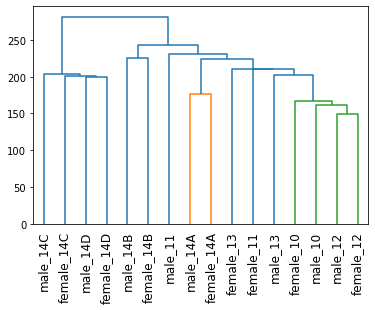

In [34]:
dendrogram(Z, labels = fpkms_log2_values.columns, leaf_rotation = 90)

Generating reorganized df using lists generated above.

In [44]:
heatmap_data=fpkms_log2_values[rows_reorg].reindex(row_indexes_reordered)

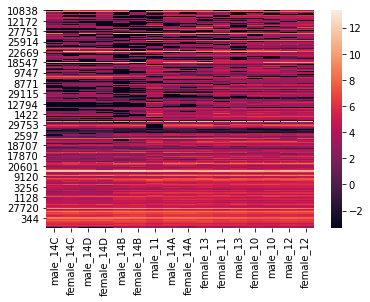

In [47]:
ax = sns.heatmap(heatmap_data)

# DGE

## Without sex

In [160]:
fpkms_log2_values

,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
3,4.573651,3.593093,4.383186,3.772605,4.240476,4.749679,4.518529,3.558602,4.459054,3.809626,4.051558,3.669331,4.995485,4.522507,3.851021,4.112914
8,3.472120,-3.321928,-3.321928,-3.321928,3.897757,-3.321928,4.145813,3.436875,-3.321928,-3.321928,3.905799,3.869772,4.353582,2.066050,-3.321928,4.665883
9,4.260622,-3.321928,3.900371,4.801878,4.484797,2.990301,3.801070,3.701063,4.222705,1.594158,4.209672,4.729653,4.784754,2.913181,2.897078,4.516802
10,2.681610,2.012708,2.665469,6.130167,6.072718,2.945977,6.230339,5.750615,5.486961,4.081859,5.728691,6.286330,6.338167,4.998373,5.621212,6.280001
11,6.899972,3.552258,6.909741,6.245611,6.188155,6.953605,6.345793,5.901059,5.602316,4.196805,5.844084,6.439396,6.453632,5.113628,5.736589,6.410012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34663,5.063561,0.209330,3.312209,8.696872,6.681296,4.675181,6.166922,6.945737,6.905339,-0.371506,5.597221,6.170259,7.891809,5.452891,6.239269,7.386673
34665,4.661599,-0.437467,4.418274,9.014515,8.350559,5.778312,8.493319,7.797501,8.259794,1.172241,7.649749,8.615611,8.760742,4.441070,6.523595,9.412730
34667,11.191931,5.095088,9.857502,12.271701,11.136488,9.213941,11.283776,10.690080,11.332554,6.260317,11.087133,11.867576,6.942632,8.818194,9.435277,12.153787
34684,-2.534805,-3.321928,-2.348207,-2.301821,-3.321928,-3.321928,-3.321928,-2.143405,0.003268,-3.321928,-3.321928,-1.927886,-1.913863,-3.321928,-3.321928,-2.713053


In [161]:
pvals=[]
for i in range(len(fpkms_log2_values.iloc[:,1])):
    test=fpkms_log2_values.iloc[i,:]
    data = [[10, test[0]],
        [11,test[1]],
        [12,test[2]],
        [13,test[3]],
        [14,test[4]],
        [14,test[5]],
        [14,test[6]],
        [14,test[7]],
        [10,test[8]],
        [11,test[9]],
        [12,test[10]],
        [13,test[11]],
        [14,test[12]],
        [14,test[13]],
        [14,test[14]],
        [14,test[15]]
        ]
    df = pd.DataFrame(data, columns = ['stage', 'log_fpkm'])
    model = smf.ols(formula = "log_fpkm ~ 1 + stage", data = df) 
    results = model.fit()
    pvals.append(list(results.pvalues)[1])

In [162]:
pvals.sort()
pvals[1:10]

[8.260525024378083e-15,
 1.454300825411588e-14,
 1.0477116535107141e-11,
 2.5361836759422562e-11,
 6.114700629209474e-11,
 1.8988419372222957e-10,
 2.2824580875882887e-10,
 3.6539440223853207e-10,
 3.796853379026104e-10]

In [163]:
df = pd.DataFrame(pvals, columns=['pval'])

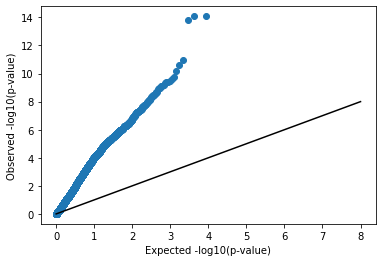

In [164]:
df['logP'] = -1 * np.log10(df['pval'])
df['uniform_points'] = range(0, len(pvals))
df['uniform_pval'] = (df['uniform_points'] + 1) / len(pvals)
df['uniform_logP'] = -1 * np.log10(df['uniform_pval'])

fig, ax = plt.subplots()
ax.scatter(df["uniform_logP"], df["logP"])
ax.plot([8,0], [8, 0], color = "black")
plt.xlabel("Expected -log10(p-value)")
plt.ylabel("Observed -log10(p-value)")
plt.show()

In [165]:
transcripts=[]
pvals=[]
for i in range(len(fpkms_log2_values.iloc[:,1])):
    test=fpkms_log2_values.iloc[i,:]
    data = [[10, test[0]],
        [11,test[1]],
        [12,test[2]],
        [13,test[3]],
        [14,test[4]],
        [14,test[5]],
        [14,test[6]],
        [14,test[7]],
        [10,test[8]],
        [11,test[9]],
        [12,test[10]],
        [13,test[11]],
        [14,test[12]],
        [14,test[13]],
        [14,test[14]],
        [14,test[15]]
        ]
    df = pd.DataFrame(data, columns = ['stage', 'log_fpkm'])
    model = smf.ols(formula = "log_fpkm ~ 1 + stage", data = df) 
    results = model.fit()
    pvals.append(list(results.pvalues)[1])
    transcripts.append(fpkms_filtered_by_median.iloc[i,0])


In [166]:
t_f = multitest.fdrcorrection(pvals, alpha=0.1, method='indep', is_sorted=False)[0]
t_f

array([False, False, False, ..., False, False, False])

In [167]:
to_df = list(zip(transcripts, t_f))
df = pd.DataFrame(to_df, columns = ['id', 'significant'])
df[df.significant == True]

,id,significant
3,FBtr0113895,True
5,FBtr0301812,True
8,FBtr0078962,True
13,FBtr0078985,True
14,FBtr0078967,True
...,...,...
8598,FBtr0100861,True
8601,FBtr0100864,True
8602,FBtr0100866,True
8605,FBtr0100870,True


## Using sex as covariate

In [128]:
fpkms_filtered_by_median.iloc[1,:]

t_name        FBtr0113885
gene_name            Parp
male_10           10.9972
male_11                 0
male_12                 0
male_13                 0
male_14A          14.8053
male_14B                0
male_14C          17.6017
male_14D          10.7293
female_10               0
female_11               0
female_12         14.8887
female_13          14.519
female_14A        20.3437
female_14B        4.08739
female_14C              0
female_14D        25.2846
Name: 8, dtype: object

In [168]:
pvals=[]
for i in range(len(fpkms_log2_values.iloc[:,1])):
    test=fpkms_log2_values.iloc[i,:]
    data = [[10, 'm', test[0]],
        [11, 'm', test[1]],
        [12, 'm', test[2]],
        [13, 'm', test[3]],
        [14, 'm', test[4]],
        [14, 'm', test[5]],
        [14, 'm', test[6]],
        [14, 'm', test[7]],
        [10, 'f', test[8]],
        [11, 'f', test[9]],
        [12, 'f', test[10]],
        [13, 'f', test[11]],
        [14, 'f', test[12]],
        [14, 'f', test[13]],
        [14, 'f', test[14]],
        [14, 'f', test[15]]
        ]
    df = pd.DataFrame(data, columns = ['stage', 'sex', 'log_fpkm'])
    model = smf.ols(formula = "log_fpkm ~ 1 + sex + stage", data = df) 
    results = model.fit()
    pvals.append(list(results.pvalues)[2])

In [169]:
pvals.sort()
pvals[1:10]

[6.477940958870726e-14,
 1.140239495337146e-13,
 2.904439998653629e-11,
 1.3232272217582566e-10,
 2.581540535500103e-10,
 6.207501137803213e-10,
 1.0208846833123602e-09,
 1.3719732171123708e-09,
 1.5086878608242107e-09]

In [170]:
df = pd.DataFrame(pvals, columns=['pval'])

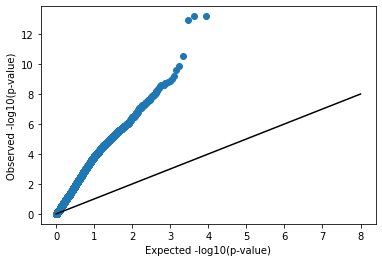

In [171]:
df['logP'] = -1 * np.log10(df['pval'])
df['uniform_points'] = range(0, len(pvals))
df['uniform_pval'] = (df['uniform_points'] + 1) / len(pvals)
df['uniform_logP'] = -1 * np.log10(df['uniform_pval'])

fig, ax = plt.subplots()
ax.scatter(df["uniform_logP"], df["logP"])
ax.plot([8,0], [8, 0], color = "black")
plt.xlabel("Expected -log10(p-value)")
plt.ylabel("Observed -log10(p-value)")
plt.show()

In [181]:
transcripts=[]
pvals=[]
for i in range(len(fpkms_log2_values.iloc[:,1])):
    test=fpkms_log2_values.iloc[i,:]
    data = [[10, 'm', test[0]],
        [11, 'm', test[1]],
        [12, 'm', test[2]],
        [13, 'm', test[3]],
        [14, 'm', test[4]],
        [14, 'm', test[5]],
        [14, 'm', test[6]],
        [14, 'm', test[7]],
        [10, 'f', test[8]],
        [11, 'f', test[9]],
        [12, 'f', test[10]],
        [13, 'f', test[11]],
        [14, 'f', test[12]],
        [14, 'f', test[13]],
        [14, 'f', test[14]],
        [14, 'f', test[15]]
        ]
    df = pd.DataFrame(data, columns = ['stage', 'sex', 'log_fpkm'])
    model = smf.ols(formula = "log_fpkm ~ 1 + sex + stage", data = df) 
    results = model.fit()
    pvals.append(list(results.pvalues)[2])
    transcripts.append(fpkms_filtered_by_median.iloc[i,0])

In [182]:
t_f = multitest.fdrcorrection(pvals, alpha=0.1, method='indep', is_sorted=False)[0]
t_f

array([False, False, False, ..., False, False, False])

In [192]:
to_df = list(zip(transcripts, t_f))
df = pd.DataFrame(to_df, columns = ['id', 'significant'])
print(df[df.significant == True])
for_color = []
for i in df["significant"]:
    if i == True:
        for_color.append(1)
    else:
        for_color.append(0)

               id  significant
3     FBtr0113895         True
5     FBtr0301812         True
8     FBtr0078962         True
13    FBtr0078985         True
14    FBtr0078967         True
...           ...          ...
8598  FBtr0100861         True
8601  FBtr0100864         True
8602  FBtr0100866         True
8605  FBtr0100870         True
8607  FBtr0100879         True

[3667 rows x 2 columns]


In [175]:
percent_overlap = (3971)/4109*100
print(percent_overlap)

96.64151861766854


## Volcano

In [176]:
results.params

Intercept    3.211157
sex[T.m]    -1.208513
stage       -0.116162
dtype: float64

In [177]:
results.params[2]

-0.11616181134551021

In [178]:
pvals = []
betas = []
for i in range(len(fpkms_log2_values.iloc[:,1])):
    test=fpkms_log2_values.iloc[i,:]
    data = [[10, 'm', test[0]],
        [11, 'm', test[1]],
        [12, 'm', test[2]],
        [13, 'm', test[3]],
        [14, 'm', test[4]],
        [14, 'm', test[5]],
        [14, 'm', test[6]],
        [14, 'm', test[7]],
        [10, 'f', test[8]],
        [11, 'f', test[9]],
        [12, 'f', test[10]],
        [13, 'f', test[11]],
        [14, 'f', test[12]],
        [14, 'f', test[13]],
        [14, 'f', test[14]],
        [14, 'f', test[15]]
        ]
    df = pd.DataFrame(data, columns = ['stage', 'sex', 'log_fpkm'])
    model = smf.ols(formula = "log_fpkm ~ 1 + sex + stage", data = df) 
    results = model.fit()
    pvals.append(list(results.pvalues)[2])
    betas.append(results.params[2])

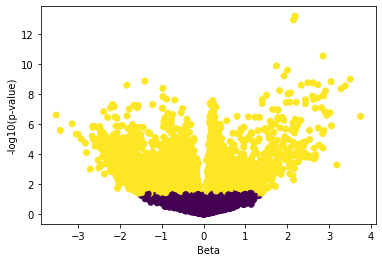

In [194]:
fig, ax = plt.subplots()
ax.scatter(betas, -1 * np.log10(pvals), c=for_color)
plt.xlabel("Beta")
plt.ylabel("-log10(p-value)")
plt.show()